In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

## HOW TO CALCULATION TOTAL PASSANGER 

In [3]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

# these are the percentage of Survived and not-Survived in data set

In [5]:
df.Survived.value_counts(normalize = True)*100 # this is percentege of survived and not survived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [6]:
df[['Pclass', 'Sex']].groupby(['Pclass'], as_index = False).count() # to find according class passanger trveling counting

,Pclass,Sex
0,1,216
1,2,184
2,3,491


In [7]:
pd.crosstab(df.Pclass, df.Sex, margins = True) # to find according class passanger trveling counting

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [8]:
df['Sex'].value_counts(normalize = True)*100 # calculation percentage Sex according to the data set 

male      64.758698
female    35.241302
Name: Sex, dtype: float64

# counting sibling and parent columns

In [9]:
df['SibSp'].value_counts() # counting sibling and spouses 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
df['Parch'].value_counts() # counting parent and childrens

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# comparing with all possible columns


In [11]:
pd.crosstab(df.Sex, df.Embarked, margins= True) # calculating male female start the journey from embarked(station)

Embarked,C,Q,S,All
Sex,,,,
female,73,36,203,312
male,95,41,441,577
All,168,77,644,889


In [12]:
pd.crosstab(df.Survived, df.Embarked, margins= True) # calculating survived and not survived according to embarked

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [13]:
pd.crosstab(df.Pclass, df.Embarked, margins = True) # genrating table according to people taken Embarked for pclass

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


# calculating percentage according to the Survived

In [14]:
# pd.crosstab(df.Pclass, df.Survived, normalize=True, margins= True)
df[['Survived', 'Pclass']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
pd.crosstab(df.Pclass, df.Survived, normalize='index')*100 # remember always use normalize = 'index'

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [16]:

pd.crosstab(df.Sex, df.Survived, normalize='index', margins = True)*100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815
All,61.616162,38.383838


##  Here more chance of survived is female 68%

In [7]:
pd.crosstab(df.Survived, df.Sex, normalize='index')*100

Sex,female,male
Survived,,
0,14.754098,85.245902
1,68.128655,31.871345


In [17]:
pd.crosstab(df.SibSp, df.Survived, normalize='index', margins = True)*100

Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000
All,61.616162,38.383838


In [18]:
pd.crosstab(df.Parch, df.Survived, normalize='index', margins = True)*100

Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000
All,61.616162,38.383838


In [19]:
pd.crosstab(df.Embarked, df.Survived, normalize='index', margins = True)*100

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652
All,61.754781,38.245219


# CALCULATING TOTAL PASSENGER ACCORDING TO ME  806 

In [20]:
(df.SibSp+df.Parch).sum()

806

# comparing with two columns

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
pd.crosstab([df.Sex, df.Pclass],df.Survived, )

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

In [23]:
pd.crosstab([df.Sex, df.Pclass],df.Survived, ).plot(kind = 'bar', figsize=(10,5))

In [24]:
pd.crosstab([df.SibSp, df.Parch],df.Survived, )

Survived       0    1
SibSp Parch          
0     0      374  163
      1       13   25
      2        8   21
      3        0    1
      4        1    0
      5        2    0
1     0       59   64
      1       23   34
      2        7   12
      3        2    1
      4        3    0
      5        2    1
      6        1    0
2     0       12    4
      1        1    6
      2        2    2
      3        0    1
3     0        0    2
      1        7    0
      2        5    2
4     1        9    0
      2        6    3
5     2        5    0
8     2        7    0

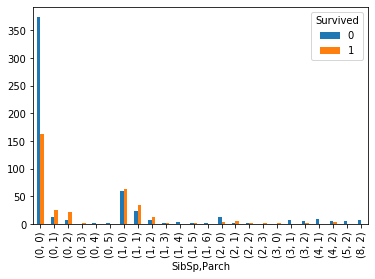

In [25]:
pd.crosstab([df.SibSp, df.Parch],df.Survived).plot(kind= 'bar')

In [26]:
pd.crosstab([df.Pclass, df.Embarked],df.Survived, )

Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  74
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67

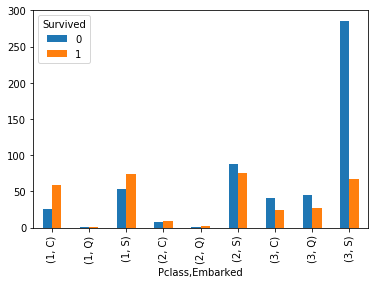

In [27]:
pd.crosstab([df.Pclass, df.Embarked],df.Survived, ).plot(kind= 'bar')

In [28]:
pd.crosstab([df.Pclass, df.SibSp], df.Survived)

Survived        0   1
Pclass SibSp         
1      0       60  77
       1       18  53
       2        1   4
       3        1   2
2      0       70  50
       1       23  32
       2        4   4
       3        0   1
3      0      268  83
       1       56  27
       2       10   5
       3       11   1
       4       15   3
       5        5   0
       8        7   0

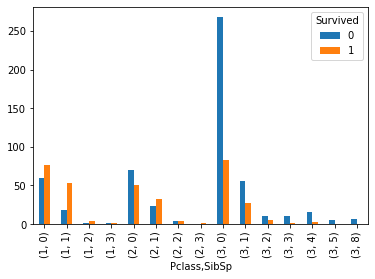

In [29]:
pd.crosstab([df.Pclass, df.SibSp], df.Survived).plot(kind = 'bar')

In [30]:
pd.crosstab([df.Pclass, df.Parch], df.Survived)

Survived        0   1
Pclass Parch         
1      0       64  99
       1       10  21
       2        5  16
       4        1   0
2      0       86  48
       1        8  24
       2        3  13
       3        0   2
3      0      295  86
       1       35  20
       2       32  11
       3        2   1
       4        3   0
       5        4   1
       6        1   0

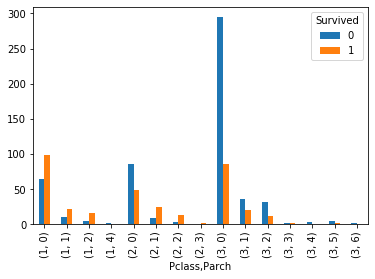

In [31]:

pd.crosstab([df.Pclass, df.Parch], df.Survived).plot(kind='bar')

# now comparing with three columns

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
pd.crosstab([df.Pclass, df.Sex, df.SibSp], df.Survived)

Survived               0   1
Pclass Sex    SibSp         
1      female 0        1  48
              1        2  38
              2        0   3
              3        0   2
       male   0       59  29
              1       16  15
              2        1   1
              3        1   0
2      female 0        3  41
              1        3  25
              2        0   3
              3        0   1
       male   0       67   9
              1       20   7
              2        4   1
3      female 0       33  48
              1       21  17
              2        3   4
              3        7   1
              4        4   2
              5        1   0
              8        3   0
       male   0      235  35
              1       35  10
              2        7   1
              3        4   0
              4       11   1
              5        4   0
              8        4   0

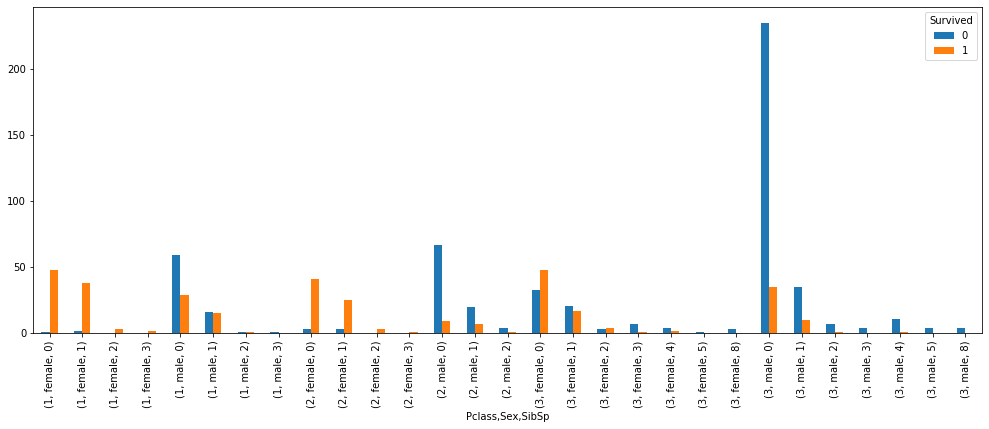

In [34]:
pd.crosstab([df.Pclass, df.Sex, df.SibSp], df.Survived).plot(kind = 'bar', figsize = (17,6))

# wirh the pivot_table not understand how it using our titanic data set

In [35]:
pd.pivot_table(df, index='Pclass', columns=['Survived', 'Sex'], values ='SibSp')

Survived         0                   1          
Sex         female      male    female      male
Pclass                                          
1         0.666667  0.272727  0.549451  0.377778
2         0.500000  0.307692  0.485714  0.529412
3         1.291667  0.523333  0.500000  0.340426

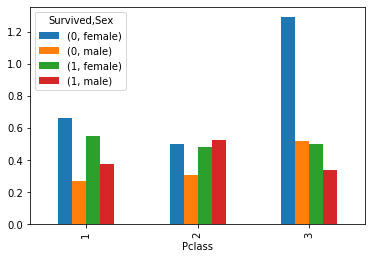

In [36]:
pd.pivot_table(df, index='Pclass', columns=['Survived', 'Sex'], values ='SibSp').plot(kind='bar')

In [37]:
pd.crosstab([df.Pclass, df.Sex, df.Parch], df.Survived)

Survived               0   1
Pclass Sex    Parch         
1      female 0        1  63
              1        0  17
              2        2  11
       male   0       63  36
              1       10   4
              2        3   5
              4        1   0
2      female 0        5  40
              1        1  17
              2        0  11
              3        0   2
       male   0       81   8
              1        7   7
              2        3   2
3      female 0       35  50
              1       13  12
              2       17   8
              3        1   1
              4        2   0
              5        3   1
              6        1   0
       male   0      260  36
              1       22   8
              2       15   3
              3        1   0
              4        1   0
              5        1   0

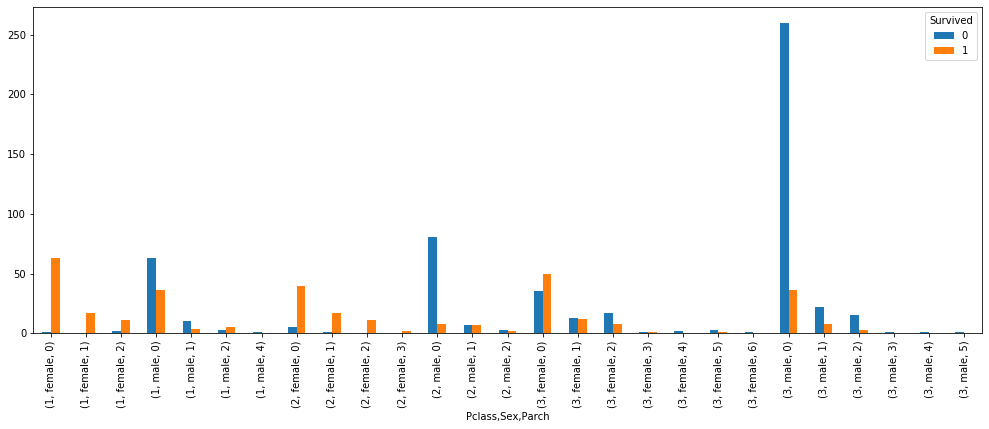

In [38]:
pd.crosstab([df.Pclass, df.Sex, df.Parch], df.Survived).plot(kind='bar', figsize = (17,6))

In [39]:
pd.crosstab([df.Pclass, df.Sex, df.Embarked], df.Survived)

Survived                  0   1
Pclass Sex    Embarked         
1      female C           1  42
              Q           0   1
              S           2  46
       male   C          25  17
              Q           1   0
              S          51  28
2      female C           0   7
              Q           0   2
              S           6  61
       male   C           8   2
              Q           1   0
              S          82  15
3      female C           8  15
              Q           9  24
              S          55  33
       male   C          33  10
              Q          36   3
              S         231  34

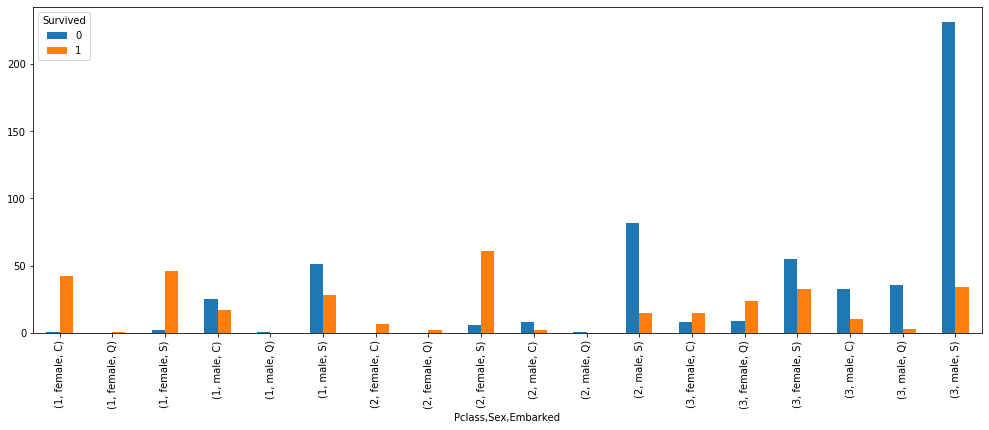

In [40]:
pd.crosstab([df.Pclass, df.Sex, df.Embarked], df.Survived).plot(kind = 'bar', figsize = (17,6))

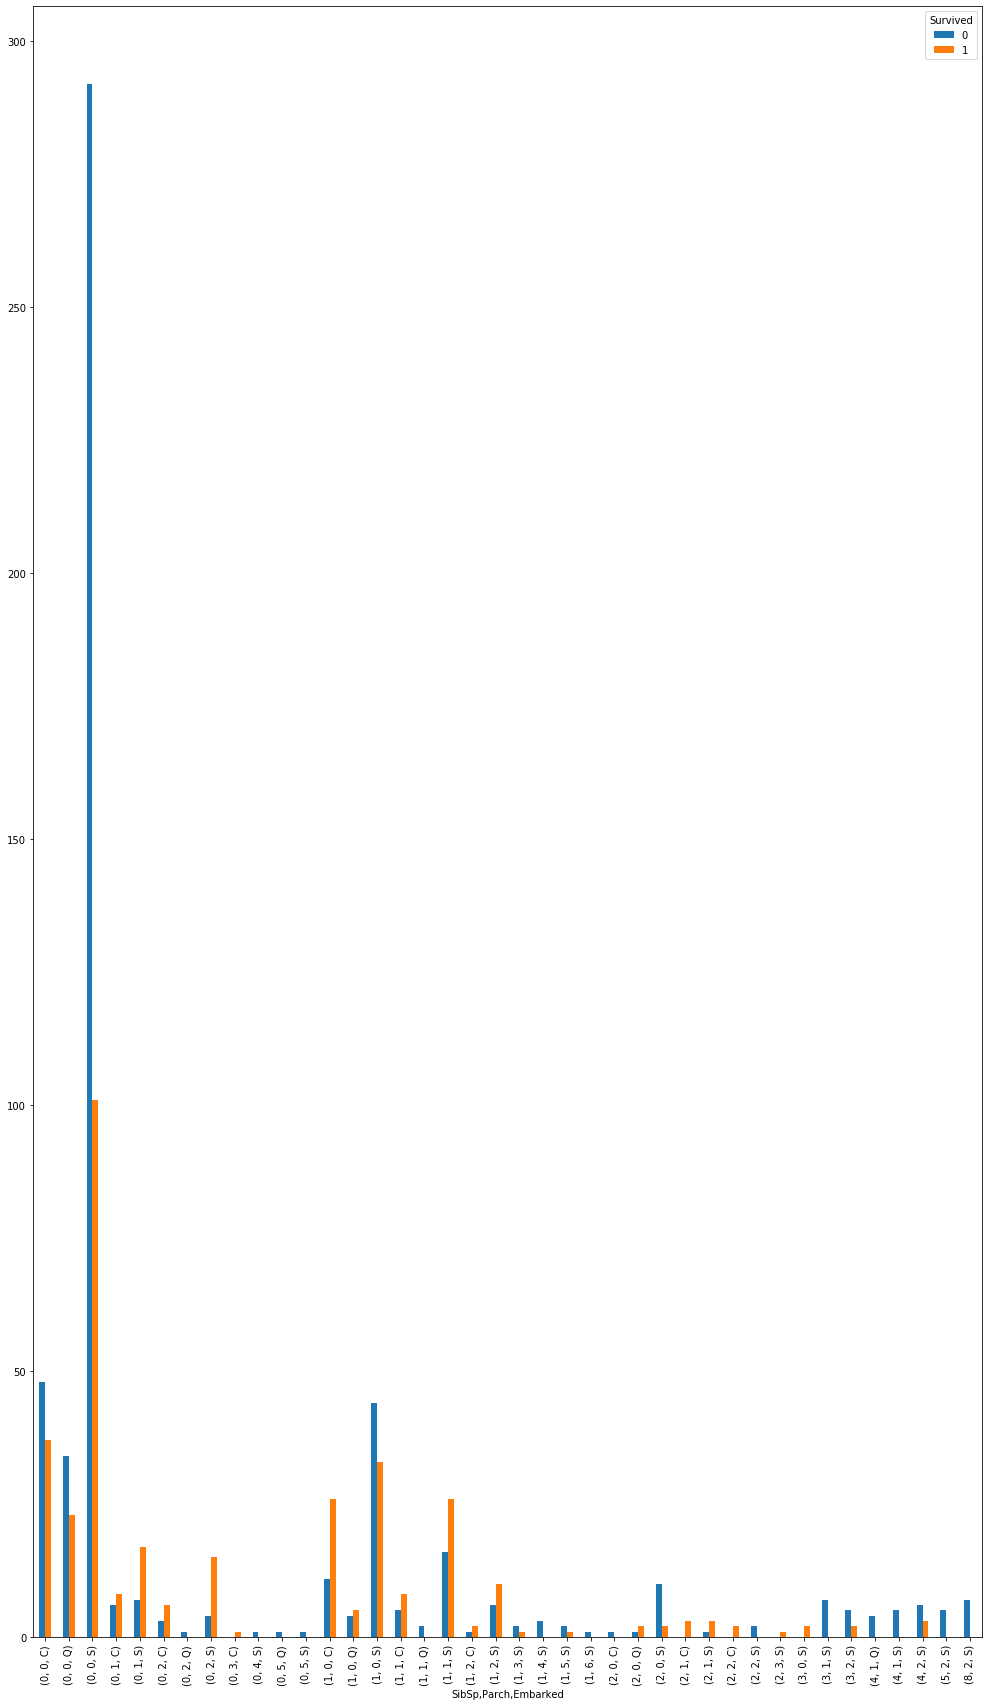

In [41]:
pd.crosstab([df.SibSp, df.Parch, df.Embarked], df.Survived).plot(kind = 'bar', figsize = (17,30))

In [42]:
pd.crosstab([df.Sex, df.SibSp, df.Parch], df.Survived)

Survived              0   1
Sex    SibSp Parch         
female 0     0       27  99
             1        3  21
             2        4  16
             3        0   1
             4        1   0
             5        2   0
       1     0       13  50
             1        6  20
             2        3   8
             3        1   1
             4        1   0
             5        1   1
             6        1   0
       2     0        1   2
             1        0   5
             2        2   2
             3        0   1
       3     0        0   2
             1        5   0
             2        2   2
       4     2        4   2
       5     2        1   0
       8     2        3   0
male   0     0      347  64
             1       10   4
             2        4   5
       1     0       46  14
             1       17  14
             2        4   4
             3        1   0
             4        2   0
             5        1   0
       2     0       11   2
             1        1   1
       3     1        2   0
             2        3   0
       4     1        9   0
             2        2   1
       5     2        4   0
       8     2        4   0

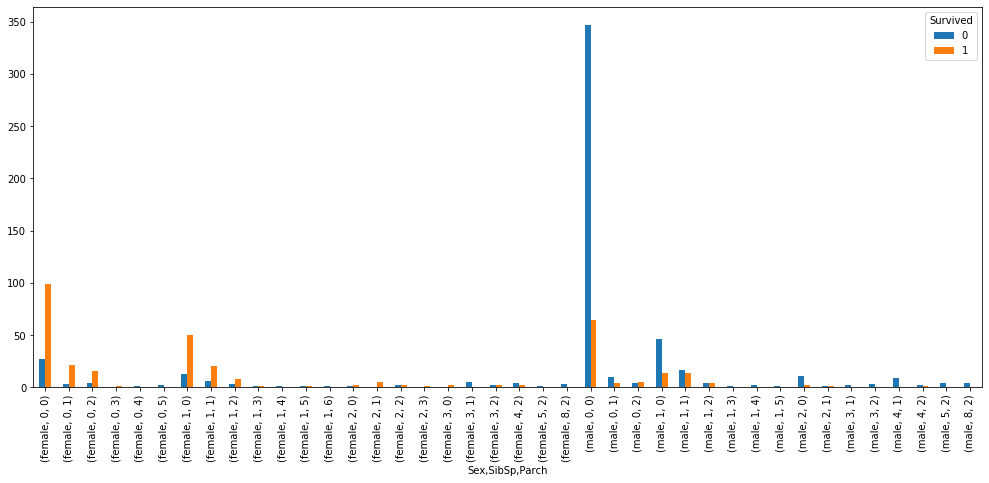

In [43]:
pd.crosstab([df.Sex, df.SibSp, df.Parch], df.Survived).plot(kind='bar', figsize = (17,7))

# now comparing 4 columns with survived

In [44]:
pd.crosstab([df.Pclass, df.Sex, df.SibSp, df.Parch], df.Survived)

Survived                     0   1
Pclass Sex    SibSp Parch         
1      female 0     0        1  33
                    1        0  10
                    2        0   5
              1     0        0  29
                    1        0   7
                    2        2   2
              2     0        0   1
                    2        0   2
              3     2        0   2
       male   0     0       50  25
                    1        7   2
                    2        2   2
              1     0       12  10
                    1        3   2
                    2        0   3
                    4        1   0
              2     0        1   1
              3     2        1   0
2      female 0     0        3  29
                    1        0   7
                    2        0   5
              1     0        2  10
                    1        1   8
                    2        0   6
                    3        0   1
              2     1        0   2
                    3        0   1
              3     0        0   1
       male   0     0       65   7
                    1        1   0
...                        ...  ..
3      female 1     2        1   0
                    3        1   0
                    4        1   0
                    5        1   1
                    6        1   0
              2     0        1   1
                    1        0   3
                    2        2   0
              3     0        0   1
                    1        5   0
                    2        2   0
              4     2        4   2
              5     2        1   0
              8     2        3   0
       male   0     0      232  32
                    1        2   2
                    2        1   1
              1     0       21   3
                    1        9   6
                    2        2   1
                    3        1   0
                    4        1   0
                    5        1   0
              2     0        7   1
              3     1        2   0
                    2        2   0
              4     1        9   0
                    2        2   1
              5     2        4   0
              8     2        4   0

[74 rows x 2 columns]

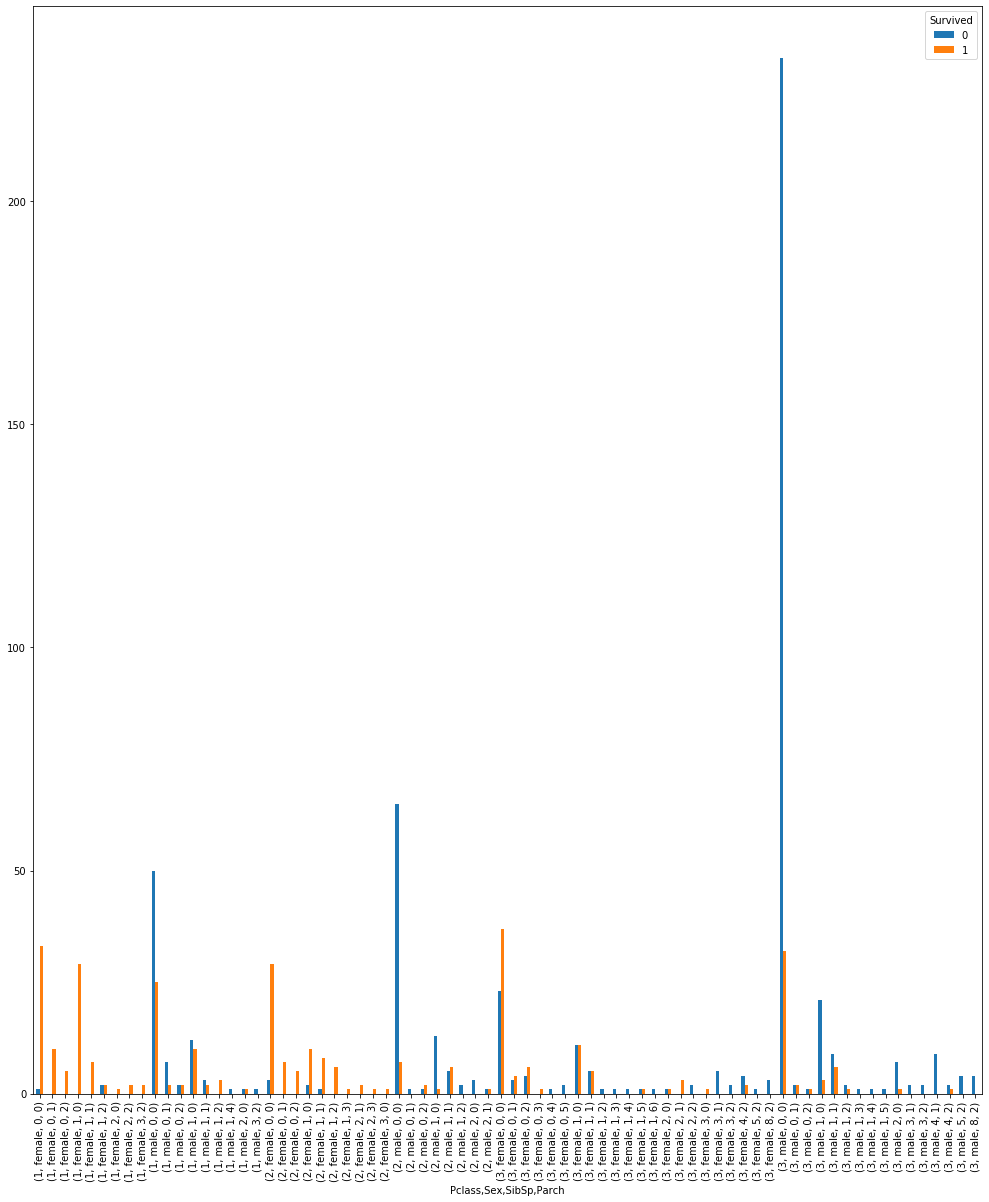

In [45]:
pd.crosstab([df.Pclass, df.Sex, df.SibSp, df.Parch], df.Survived).plot(kind = 'bar', figsize = (17, 20))

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
pd.crosstab([df.Sex, df.SibSp, df.Parch, df.Embarked], df.Survived)

Survived                       0   1
Sex    SibSp Parch Embarked         
female 0     0     C           2  23
                   Q           6  21
                   S          19  53
             1     C           2   5
                   S           1  16
             2     C           1   4
                   Q           1   0
                   S           2  12
             3     C           0   1
             4     S           1   0
             5     Q           1   0
                   S           1   0
       1     0     C           3  20
                   Q           0   5
                   S          10  25
             1     C           1   4
                   Q           1   0
                   S           4  16
             2     C           0   2
                   S           3   6
             3     S           1   1
             4     S           1   0
             5     S           1   1
             6     S           1   0
       2     0     Q           0   1
                   S           1   1
             1     C           0   3
                   S           0   2
             2     C           0   2
                   S           2   0
...                          ...  ..
       8     2     S           3   0
male   0     0     C          46  14
                   Q          28   2
                   S         273  48
             1     C           4   3
                   S           6   1
             2     C           2   2
                   S           2   3
       1     0     C           8   6
                   Q           4   0
                   S          34   8
             1     C           4   4
                   Q           1   0
                   S          12  10
             2     C           1   0
                   S           3   4
             3     S           1   0
             4     S           2   0
             5     S           1   0
       2     0     C           1   0
                   Q           1   1
                   S           9   1
             1     S           1   1
       3     1     S           2   0
             2     S           3   0
       4     1     Q           4   0
                   S           5   0
             2     S           2   1
       5     2     S           4   0
       8     2     S           4   0

[66 rows x 2 columns]

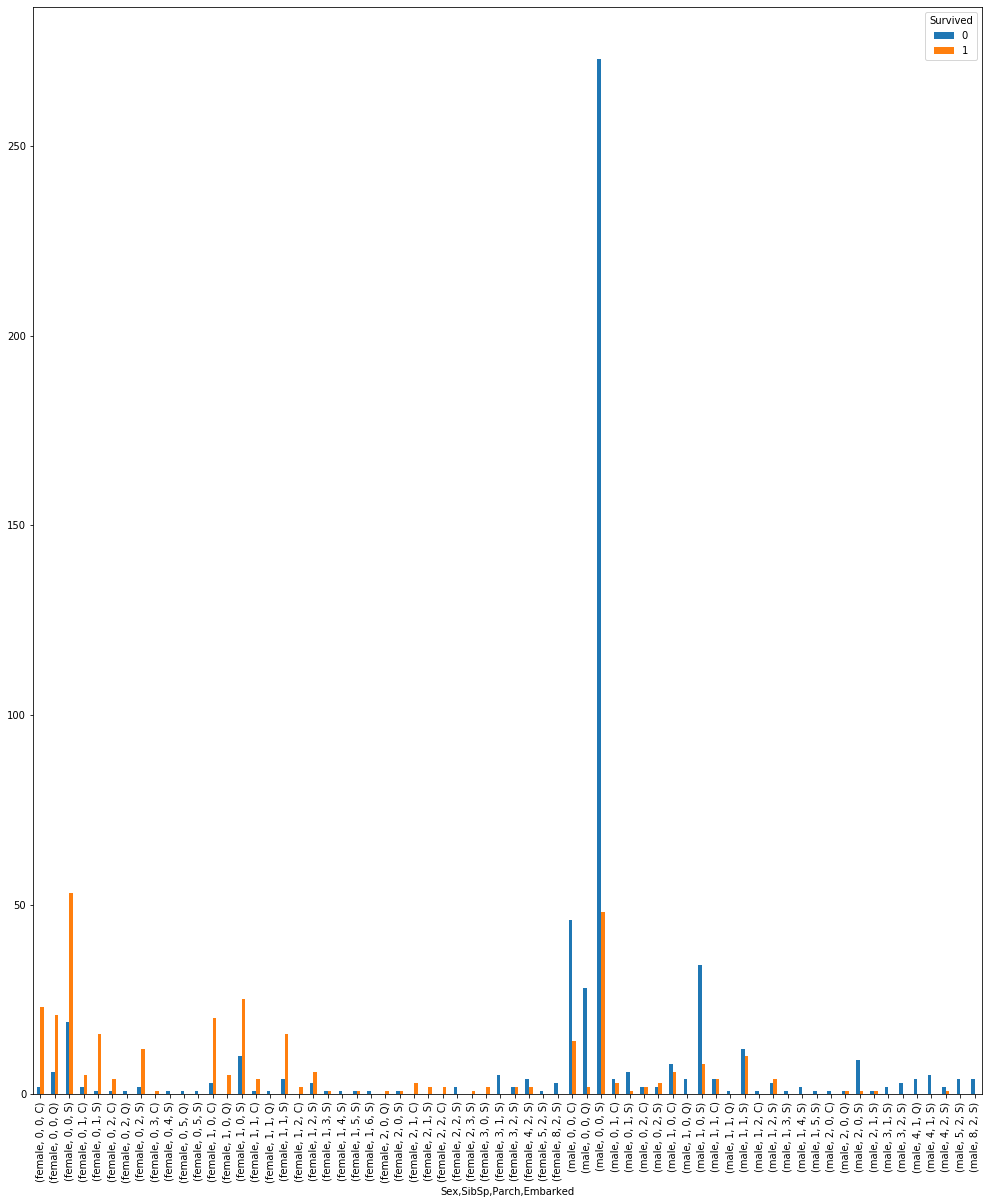

In [48]:
pd.crosstab([df.Sex, df.SibSp, df.Parch, df.Embarked], df.Survived).plot(kind = 'bar', figsize = (17, 20))

In [49]:
pd.crosstab([df.Pclass, df.Sex, df.SibSp, df.Parch, df.Embarked], df.Survived)

Survived                              0   1
Pclass Sex    SibSp Parch Embarked         
1      female 0     0     C           1  17
                          S           0  14
                    1     C           0   4
                          S           0   6
                    2     C           0   1
                          S           0   4
              1     0     C           0  15
                          Q           0   1
                          S           0  13
                    1     C           0   3
                          S           0   4
                    2     S           2   2
              2     0     S           0   1
                    2     C           0   2
              3     2     S           0   2
       male   0     0     C          15   8
                          S          35  17
                    1     C           4   2
                          S           3   0
                    2     C           2   1
                          S           0   1
              1     0     C           3   5
                          S           9   5
                    1     C           1   1
                          S           2   1
                    2     S           0   3
                    4     S           1   0
              2     0     Q           1   0
                          S           0   1
              3     2     S           1   0
...                                 ...  ..
3      female 3     2     S           2   0
              4     2     S           4   2
              5     2     S           1   0
              8     2     S           3   0
       male   0     0     C          28   5
                          Q          27   2
                          S         177  25
                    1     C           0   1
                          S           2   1
                    2     S           1   1
              1     0     C           2   1
                          Q           4   0
                          S          15   2
                    1     C           2   3
                          Q           1   0
                          S           6   3
                    2     S           2   1
                    3     S           1   0
                    4     S           1   0
                    5     S           1   0
              2     0     C           1   0
                          Q           0   1
                          S           6   0
              3     1     S           2   0
                    2     S           2   0
              4     1     Q           4   0
                          S           5   0
                    2     S           2   1
              5     2     S           4   0
              8     2     S           4   0

[117 rows x 2 columns]

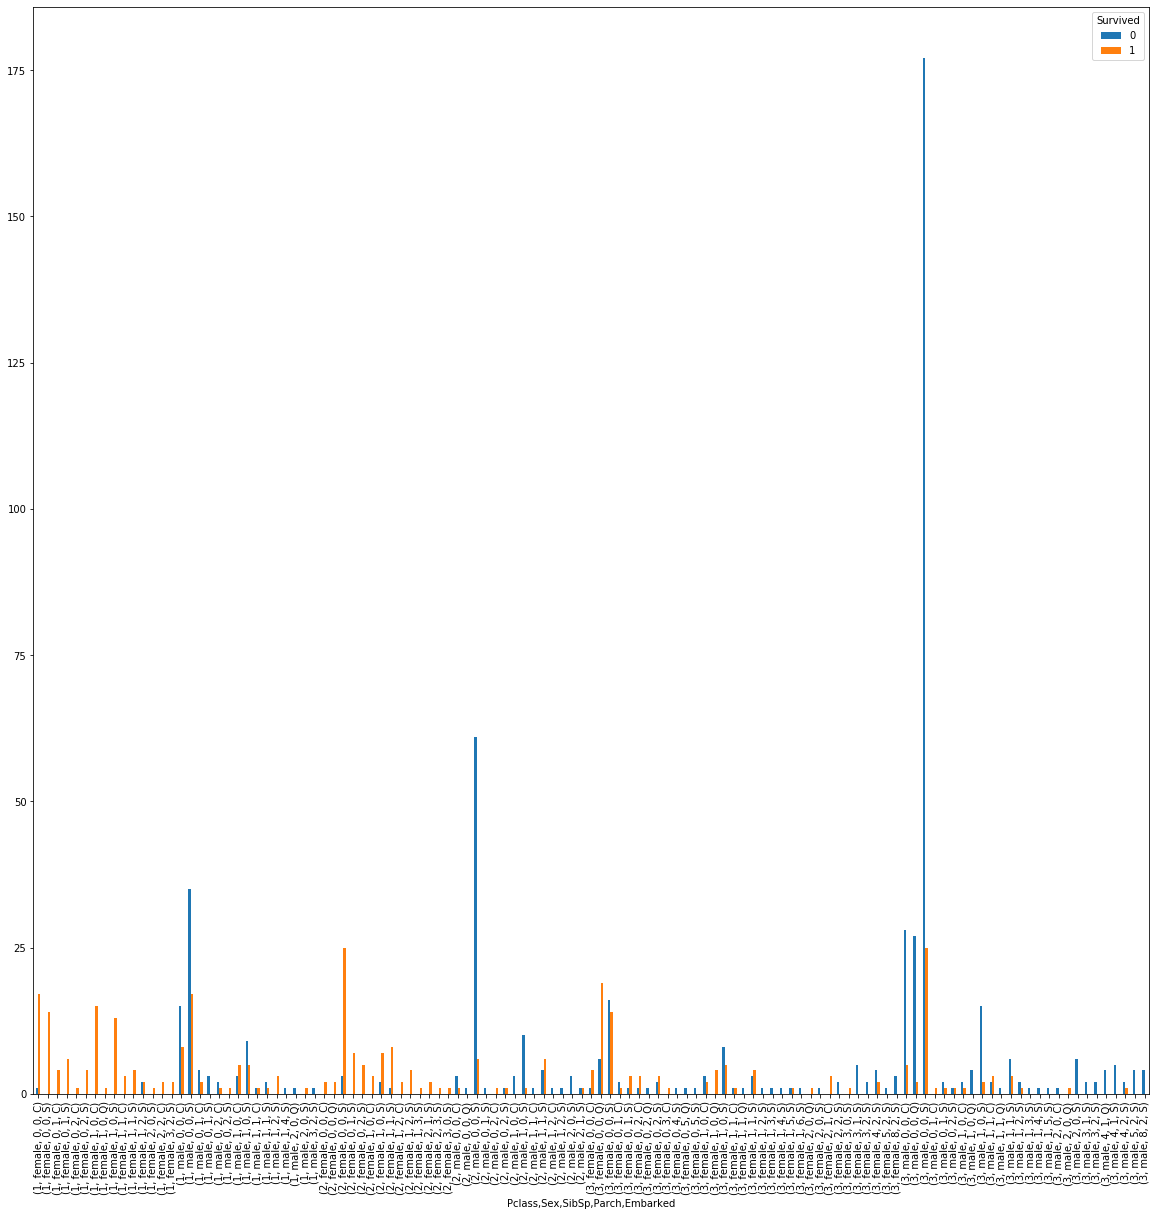

In [50]:
pd.crosstab([df.Pclass, df.Sex, df.SibSp, df.Parch, df.Embarked], df.Survived).plot(kind = 'bar', figsize = (20, 20))